## KMeans Clustering

K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

- The centroids of the K clusters, which can be used to label new data
- Labels for the training data (each data point is assigned to a single cluster)

## Customer Segementation In KMeans Clustering

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.sample(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
34,35,Female,49,33,14
48,49,Female,29,40,42
94,95,Female,32,60,42
2,3,Female,20,16,6
173,174,Male,36,87,92
78,79,Female,23,54,52
138,139,Male,19,74,10
51,52,Male,33,42,60
121,122,Female,38,67,40
171,172,Male,28,87,75


### EDA

<AxesSubplot:xlabel='Genre', ylabel='count'>

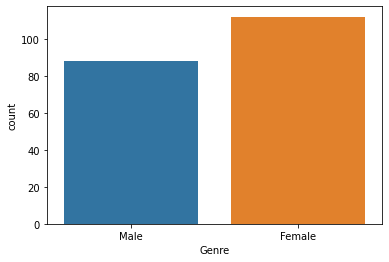

In [4]:
sns.countplot(x="Genre",data=data)

In [12]:
data['Age'].max()

70

In [13]:
data['Age'].min()

18

In [17]:
data['Annual_Income_(k$)'].max()

137

In [18]:
data['Annual_Income_(k$)'].min()

15

In [39]:
fig = px.histogram(data_frame=data,x="Age",marginal="box",nbins=70-18,title="Age Distribution")
fig.update_layout(bargap=0.2)

In [35]:
fig = px.histogram(data_frame=data,x="Annual_Income_(k$)",marginal="box",nbins=50,title=("Annual Income Distribution"))
fig.update_layout(bargap=0.2)

Text(0.5, 1.0, 'Correlation')

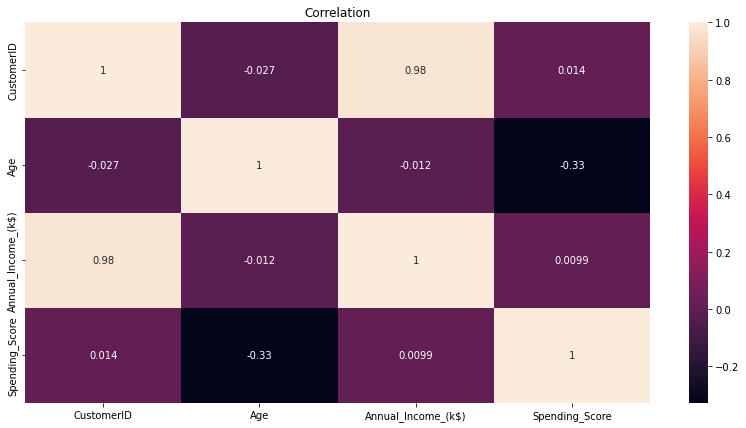

In [40]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation")

Text(0.5, 1.0, 'Pairplot for the Data')

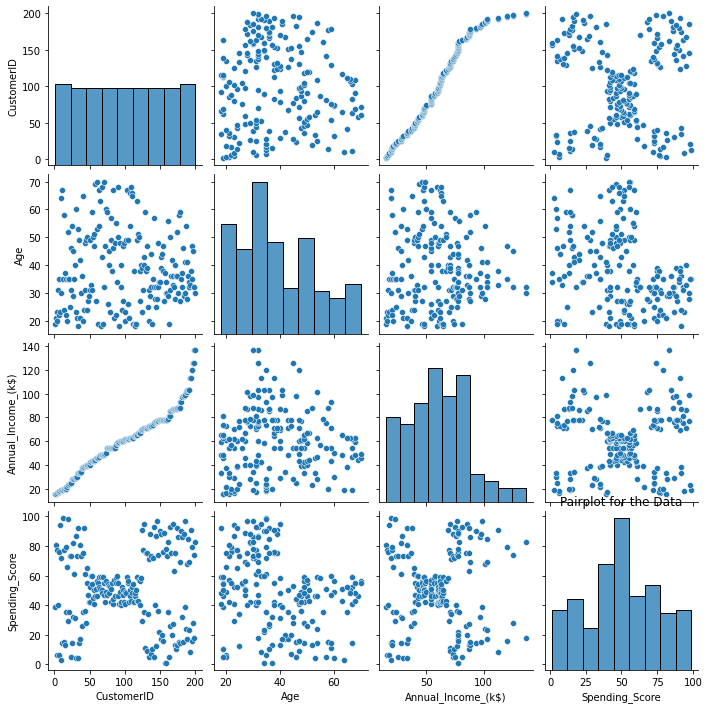

In [45]:
sns.pairplot(data)
plt.title('Pairplot for the Data')

In [41]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(data[['Age','Annual_Income_(k$)','Spending_Score']])

In [42]:
wcss=[]

for i in range(1,11):
    #KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia_ is the formula used to segregate the data points into clusters

Text(0, 0.5, 'wcss')

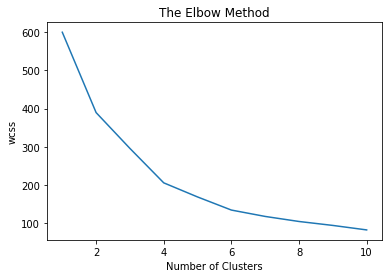

In [43]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

In [44]:
#observe the curve you can choose k=4/5

### For k=5

In [48]:
model = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42,algorithm='elkan')
labels = model.fit_predict(X)

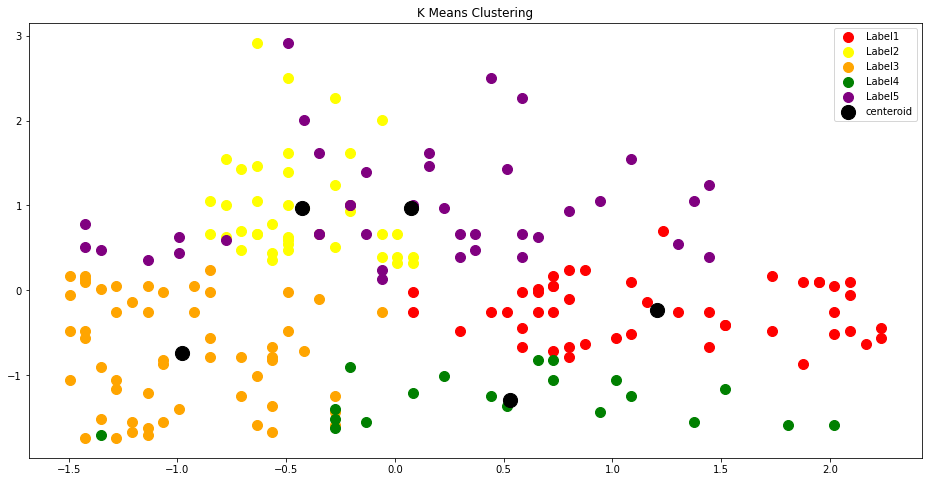

In [54]:
plt.figure(figsize=(16,8))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, color = 'red', label = 'Label1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'yellow', label = 'Label2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'orange', label = 'Label3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'green', label = 'Label4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 100, c = 'purple', label = 'Label5')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s = 200, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering')
plt.legend()

### For k=4

In [55]:
model = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42,algorithm='elkan')
labels = model.fit_predict(X)

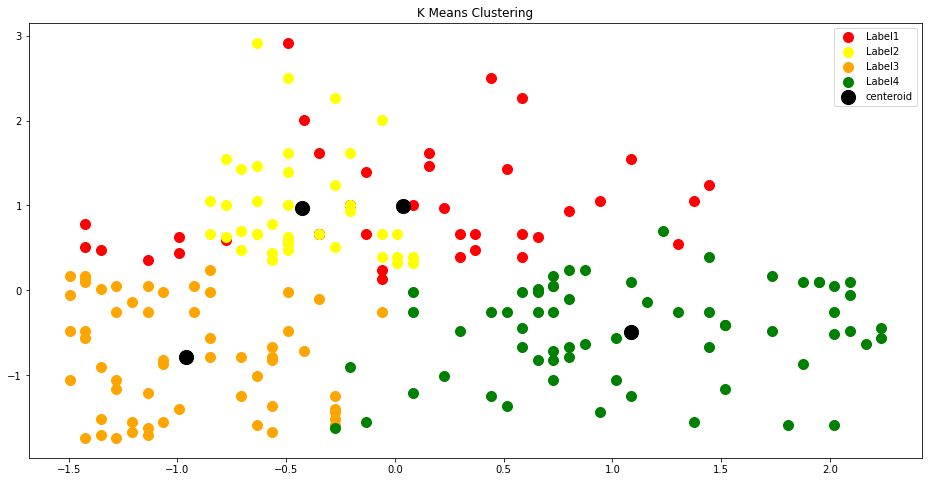

In [56]:
plt.figure(figsize=(16,8))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, color = 'red', label = 'Label1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'yellow', label = 'Label2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'orange', label = 'Label3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'green', label = 'Label4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s = 200, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering')
plt.legend()

Ok, in the above model we used all features to fit in the model which looked quite mess up. Let us now look at 1 or 2 individual features and see how KMeans clusters out the data

In [62]:
def elbow_method(feature):
    wcss=[]

    for i in range(1,11):
        #KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(feature)
        wcss.append(kmeans.inertia_) #inertia_ is the formula used to segregate the data points into clusters

    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('wcss')

### Age and Spending Score

In [59]:
feature_check1 = data[['Age','Spending_Score']]

In [60]:
feature_check1 = ss.fit_transform(feature_check1)

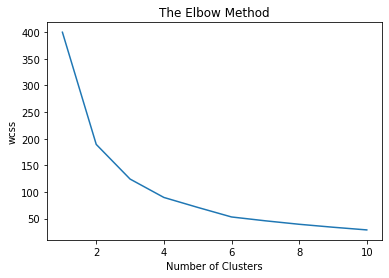

In [63]:
elbow_method(feature_check1)

In [64]:
model = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42,algorithm='elkan')
labels = model.fit_predict(feature_check1)

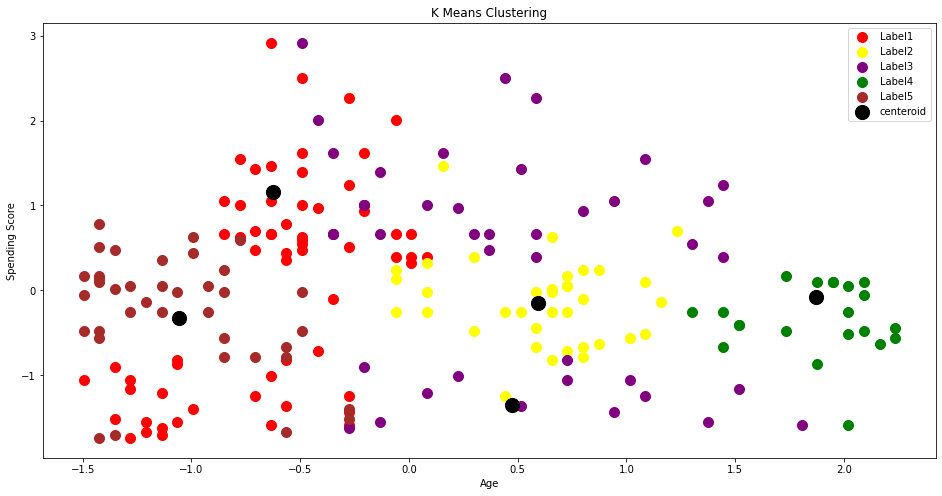

In [66]:
plt.figure(figsize=(16,8))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, color = 'red', label = 'Label1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'yellow', label = 'Label2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'purple', label = 'Label3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'green', label = 'Label4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 100, c = 'brown', label = 'Label5')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s = 200, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

### Annual Income and Spending Score

In [67]:
feature_check2 = data[['Annual_Income_(k$)','Spending_Score']]

In [68]:
feature_check2 = ss.fit_transform(feature_check2)

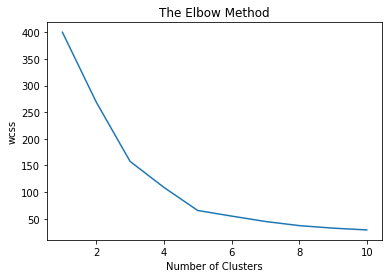

In [69]:
elbow_method(feature_check2)

In [70]:
model = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42,algorithm='elkan')
labels = model.fit_predict(feature_check2)

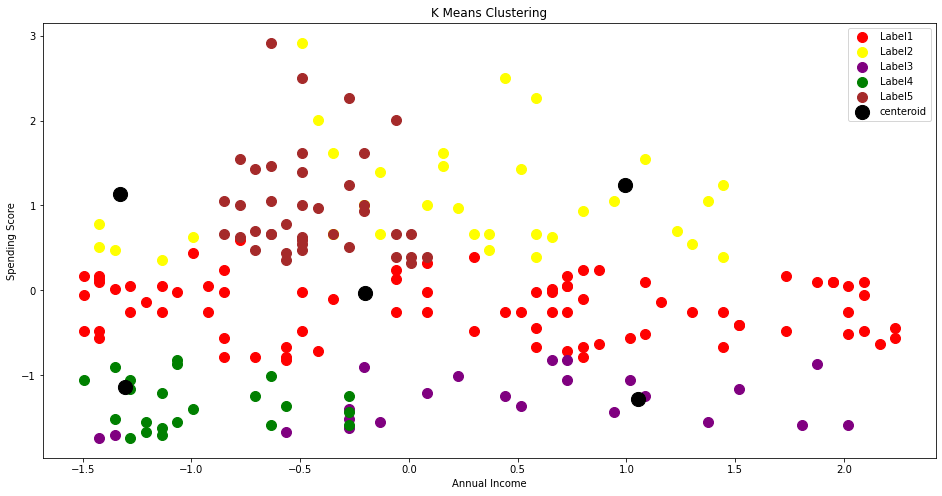

In [71]:
plt.figure(figsize=(16,8))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, color = 'red', label = 'Label1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'yellow', label = 'Label2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'purple', label = 'Label3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'green', label = 'Label4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 100, c = 'brown', label = 'Label5')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s = 200, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()